# [`colorcet`](https://github.com/bokeh/colorcet): Perceptually uniform colormaps from CET

Peter Kovesi at the Center for Exploration Targeting created a very useful set of [perceptually uniform colormaps](https://arxiv.org/abs/1509.03700), many of which can replace the highly non-uniform colormaps provided with Python plotting programs.  Here we will show how to use them via the new [colorcet](https://github.com/bokeh/colorcet) python package, listing all the ones available and allowing you to evaluate how perceptually uniform they are for you, your particular monitor, etc. Download and installation instructions are at the [github site](https://github.com/bokeh/colorcet). Note that this web page is also a [notebook](https://github.com/bokeh/colorcet/blob/master/docs/index.ipynb), if you want to recreate the results yourself.

We will plot them using [matplotlib](http://matplotlib.org) via [holoviews](http://holoviews.org), but identical [bokeh](http://bokeh.pydata.org) palettes are also provided, and both Bokeh palettes and Matplotlib colormaps are usable in [datashader](https://github.com/bokeh/datashader).  Thus these colormaps can be used in any of those Python packages, as well as any other package that accepts a Python list of normalized RGB tuples or hex colors.  See 
[Peter's site](http://peterkovesi.com/projects/colourmaps/) to download versions for other non-Python packages.

We first make some utilities for sorting and visualizing colormaps:
<style>div.prompt {display:none}</style>

In [1]:
import numpy as np
import holoviews as hv
import colorcet as cc

hv.notebook_extension()

import param
with param.logging_level('CRITICAL'):
    hv.plotting.mpl.LayoutPlot.v17_layout_format = True

/home/kalidus/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [84]:
%opts Image [xaxis='bare' yaxis='bare' sublabel_format=None aspect=3 fontsize=13]

# Collapse all colormap aliases into a single string, and then sort by it
inverse = {}
inv_rev = {}
for k,v in cc.cm.items():
    if not k[-2:] == "_r":
        inverse[v] = inverse.get(v, [])
        inverse[v].insert(0,k)
    else:
        inv_rev[v] = inverse.get(v, [])
        inv_rev[v].insert(0,k)
all_cms = {',  '.join(reversed(v)):k for (k,v) in inverse.items()}.items()
rev_cms = {',  '.join(reversed(v)):k for (k,v) in inv_rev.items()}.items()


aliased_cms=[(k,v) for (k,v) in all_cms if "," in k]

def lay_out_in_columns(_list, cols, spacer=None):
    """Given a list, reorder it into the number of columns specified, filling missing items with the given spacer."""
    rows = int(np.ceil(len(_list)*1.0/cols))
    padded = _list + [spacer] * (rows*cols-len(_list))
    return list(np.array(padded).reshape(cols,rows).T.flat)

xs,ys = np.meshgrid(np.linspace(0,1,80), np.linspace(0,1,10))

def colormaps(named_cms,cols=3,array=xs):
    images = [hv.Image(array, group=name)(style=dict(cmap=cm)) 
              for name,cm in named_cms]
    return hv.Layout(lay_out_in_columns(images,cols,hv.Empty())).display('all').cols(cols)

In [86]:
dict(rev_cms)

{'bgy_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebae7048>,
 'bgyw_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebac8048>,
 'bjy_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebd7af98>,
 'bkr_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebcdb048>,
 'bky_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebd09048>,
 'blues_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eba27048>,
 'bmw_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eba00048>,
 'colorwheel_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebeae048>,
 'coolwarm_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebcb9470>,
 'cyclic_grey_15_85_c0_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebfc0048>,
 'cyclic_grey_15_85_c0_s25_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebf70048>,
 'cyclic_mrybm_35_75_c68_r': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebf20048>,
 'cyclic_mrybm_35_75_c68_s25_r': <matplotlib.colors.

## Accessing the colormaps

After importing `colorcet` as `cc`, all the colormaps shown in this notebook will be available for use in different forms, with hopefully at least one such form convenient for any particular application.  There are two different basic versions for each colormap, each of which is fundamentally a list of 256 distinct colors: 

1. A Bokeh-style palette, i.e., a Python list of RGB colors as hex strings, like ``['#000000', ..., '#ffffff']``
2. If matplotlib is installed and importable, a Matplotlib ``LinearSegmentedColormap`` using normalized magnitudes, like ``LinearSegmentedColormap.from_list("fire",[ [0.0,0.0,0.0], ..., [1.0,1.0,1.0] ], 256)``

The Bokeh-compatible palettes are provided as attributes in the ``colorcet`` namespace, with long names prefixed with ``b_`` or a short name (if any) with no prefix.  E.g. ``linear_kryw_0_100_c71`` can be accessed as ``cc.b_linear_kryw_0_100_c71`` or by the short name ``cc.fire``, which both return the same Bokeh palette.  These names should tab complete once ``cc`` has been imported.  Because Bokeh palettes are just Python lists, you can always reverse them using normal Python syntax, e.g. ``list(reversed(cc.fire))``.  If you want to access the palettes by string name, they are also collected into a dictionary named ``palette``, so you can use ``cc.palette["linear_kryw_0_100_c71"]`` or  ``cc.palette["fire"]`` instead if that is more convenient. 

The Matplotlib colormaps are also provided as tab-completable attributes, but consistently with a prefix ``m_``, e.g. ``cc.m_linear_kryw_0_100_c71`` or ``cc.m_fire``.  Already reversed versions are also available, as ``cc.m_linear_kryw_0_100_c71_r`` or ``cc.m_fire_r``.  The same colormaps are also registered with matplotlib's string-based dictionary with the prefix ``cet_``, making them available by name within various matplotlib functions (e.g. ``cet_linear_kryw_0_100_c71``, ``cet_linear_kryw_0_100_c71_r``, ``cet_fire``, or  ``cet_fire_r``).  Finally, if you want to access the colormaps by string name without using Matplotlib's registry, they are also stored in the ``cc.cm`` dictionary, e.g. ``cc.cm["linear_kryw_0_100_c71"]``, ``cc.cm["linear_kryw_0_100_c71_r"]``, ``cc.cm["fire"]``, or ``cc.cm["fire_r"]``.

In each case, the names used are the shortest ones that are expected to be unique in that context, and in practice you are only likely to need one of these forms for any particular application.

## Named colormaps

The full list of colormaps included will be shown below, but a useful subset of these maps that cover the various types have been given more convenient names, and we will focus on those first.  

### Linear (sequential) colormaps, for plotting magnitudes:

In [4]:
[i for i in aliased_cms if "linear" in i[0] and "diverging" not in i[0]]

[('linear_ternary_red_0_50_c52,  kr',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17ddacc88>),
 ('linear_bmy_10_95_c78,  inferno',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17e078358>),
 ('linear_ternary_blue_0_44_c57,  kb',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17de4b9e8>),
 ('linear_grey_10_95_c0,  dimgray',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17df29208>),
 ('linear_green_5_95_c69,  kgy',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17dfc9f28>),
 ('linear_kryw_0_100_c71,  fire',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17deb7dd8>),
 ('linear_ternary_green_0_46_c42,  kg',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17ddfe358>),
 ('linear_bgy_10_95_c74,  bgy',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17e1fcf28>),
 ('linear_bgyw_15_100_c68,  bgyw',
  <matplotlib.colors.LinearSegmentedColormap at 0x7fb17e15f208>),
 ('linear_blue_95_50_c20,  blues',
  <matplotlib.colors.LinearSegmentedColormap at 

:Layout
   .Linear_ternary_red_0_50_c52_comma_kr.I   :Image   [x,y]   (z)
   .Linear_kryw_0_100_c71_comma_fire.I       :Image   [x,y]   (z)
   .Linear_blue_5_95_c73_comma_kbc.I         :Image   [x,y]   (z)
   .Linear_bmy_10_95_c78_comma_inferno.I     :Image   [x,y]   (z)
   .Linear_ternary_green_0_46_c42_comma_kg.I :Image   [x,y]   (z)
   .Linear_bmw_5_95_c89_comma_bmw.I          :Image   [x,y]   (z)
   .Linear_ternary_blue_0_44_c57_comma_kb.I  :Image   [x,y]   (z)
   .Linear_bgy_10_95_c74_comma_bgy.I         :Image   [x,y]   (z)
   .Linear_grey_0_100_c0_comma_gray.I        :Image   [x,y]   (z)
   .Linear_grey_10_95_c0_comma_dimgray.I     :Image   [x,y]   (z)
   .Linear_bgyw_15_100_c68_comma_bgyw.I      :Image   [x,y]   (z)
   .Empty.I                                  :Empty
   .Linear_green_5_95_c69_comma_kgy.I        :Image   [x,y]   (z)
   .Linear_blue_95_50_c20_comma_blues.I      :Image   [x,y]   (z)
   .Empty.II                                 :Empty
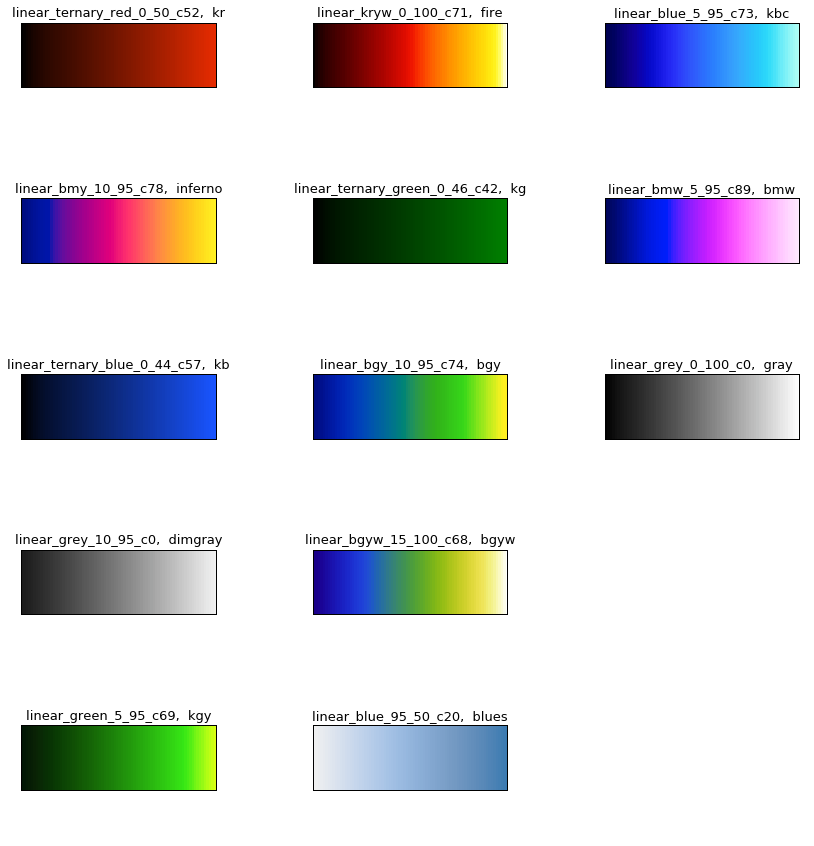

In [5]:
colormaps([i for i in aliased_cms if "linear" in i[0] and "diverging" not in i[0]])

### Diverging colormaps, for plotting magnitudes increasing or decreasing from a central point:

:Layout
   .Diverging_bky_60_10_c30_comma_bky.I        :Image   [x,y]   (z)
   .Diverging_bwr_40_95_c42_comma_coolwarm.I   :Image   [x,y]   (z)
   .Diverging_linear_bjy_30_90_c45_comma_bjy.I :Image   [x,y]   (z)
   .Diverging_gwv_55_95_c39_comma_gwv.I        :Image   [x,y]   (z)
   .Diverging_bkr_55_10_c35_comma_bkr.I        :Image   [x,y]   (z)
   .Empty.I                                    :Empty
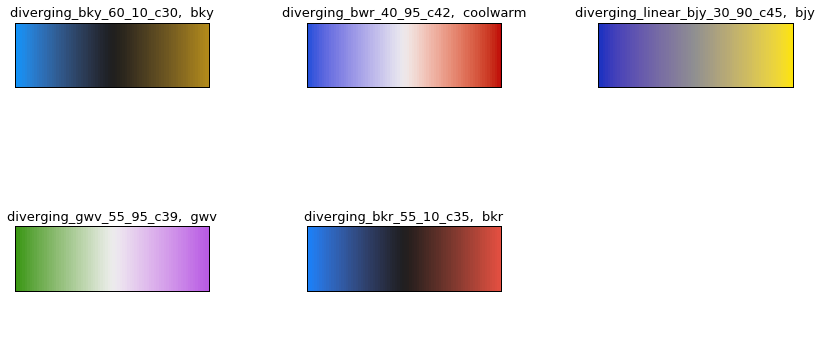

In [6]:
colormaps([i for i in aliased_cms if "diverging" in i[0]])

### Misc colormaps:

* cyclic: for cyclic quantities like orientation or phase (where the highest and lowest values need the same color)
* isoluminant: to highlight low spatial-frequency information
* rainbow: to highlight local differences in sequential data

:Layout
   .Cyclic_mygbm_30_95_c78_s25_comma_colorwheel.I :Image   [x,y]   (z)
   .Rainbow_bgyr_35_85_c73_comma_rainbow.I        :Image   [x,y]   (z)
   .Isoluminant_cgo_80_c38_comma_isolum.I         :Image   [x,y]   (z)
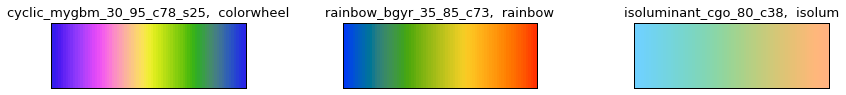

In [7]:
colormaps([i for i in aliased_cms if "cyclic" in i[0] or "rainbow" in i[0] or "isoluminant" in i[0]])

## Full list of available colormaps

This list includes all those above, plus other variants and alternatives.  Each colormap has a name in the form:

*category*`_`*huesequence*`_`*lightnessrange*`_c`*meanchroma*`[_`s*colorshift*`_[`r*ifreversed*`]]`

along with any shorter alias that may be defined above.

:Layout
   .Rainbow_bgyrm_35_85_c71.I                     :Image   [x,y]   (z)
   .Linear_kryw_5_100_c67.I                       :Image   [x,y]   (z)
   .Cyclic_mrybm_35_75_c68_s25.I                  :Image   [x,y]   (z)
   .Linear_blue_5_95_c73_comma_kbc.I              :Image   [x,y]   (z)
   .Cyclic_wrwbw_40_90_c42_s25.I                  :Image   [x,y]   (z)
   .Linear_gow_60_85_c27.I                        :Image   [x,y]   (z)
   .Cyclic_mygbm_30_95_c78.I                      :Image   [x,y]   (z)
   .Linear_bmw_5_95_c86.I                         :Image   [x,y]   (z)
   .Diverging_bky_60_10_c30_comma_bky.I           :Image   [x,y]   (z)
   .Linear_kryw_5_100_c64.I                       :Image   [x,y]   (z)
   .Rainbow_bgyr_35_85_c73_comma_rainbow.I        :Image   [x,y]   (z)
   .Linear_bmw_5_95_c89_comma_bmw.I               :Image   [x,y]   (z)
   .Linear_ternary_red_0_50_c52_comma_kr.I        :Image   [x,y]   (z)
   .Linear_green_5_95_c69_comma_kgy.I             :Image   [x,y]   (z)
   .Cyclic_grey_15_85_c0.I                        :Image   [x,y]   (z)
   .Linear_grey_0_100_c0_comma_gray.I             :Image   [x,y]   (z)
   .Linear_bmy_10_95_c78_comma_inferno.I          :Image   [x,y]   (z)
   .Rainbow_bgyrm_35_85_c69.I                     :Image   [x,y]   (z)
   .Isoluminant_cgo_80_c38_comma_isolum.I         :Image   [x,y]   (z)
   .Diverging_bwr_55_98_c37.I                     :Image   [x,y]   (z)
   .Diverging_linear_bjr_30_55_c53.I              :Image   [x,y]   (z)
   .Diverging_gwv_55_95_c39_comma_gwv.I           :Image   [x,y]   (z)
   .Linear_ternary_green_0_46_c42_comma_kg.I      :Image   [x,y]   (z)
   .Diverging_bkr_55_10_c35_comma_bkr.I           :Image   [x,y]   (z)
   .Linear_ternary_blue_0_44_c57_comma_kb.I       :Image   [x,y]   (z)
   .Diverging_isoluminant_cjm_75_c23.I            :Image   [x,y]   (z)
   .Linear_bgy_10_95_c74_comma_bgy.I              :Image   [x,y]   (z)
   .Diverging_isoluminant_cjm_75_c24.I            :Image   [x,y]   (z)
   .Linear_gow_65_90_c35.I                        :Image   [x,y]   (z)
   .Diverging_gwr_55_95_c38.I                     :Image   [x,y]   (z)
   .Diverging_bwr_40_95_c42_comma_coolwarm.I      :Image   [x,y]   (z)
   .Diverging_linear_bjy_30_90_c45_comma_bjy.I    :Image   [x,y]   (z)
   .Diverging_gkr_60_10_c40.I                     :Image   [x,y]   (z)
   .Diverging_rainbow_bgymr_45_85_c67.I           :Image   [x,y]   (z)
   .Linear_bgyw_15_100_c68_comma_bgyw.I           :Image   [x,y]   (z)
   .Linear_bmy_10_95_c71.I                        :Image   [x,y]   (z)
   .Isoluminant_cgo_70_c39.I                      :Image   [x,y]   (z)
   .Isoluminant_cm_70_c39.I                       :Image   [x,y]   (z)
   .Cyclic_grey_15_85_c0_s25.I                    :Image   [x,y]   (z)
   .Diverging_isoluminant_cjo_70_c25.I            :Image   [x,y]   (z)
   .Cyclic_mygbm_30_95_c78_s25_comma_colorwheel.I :Image   [x,y]   (z)
   .Cyclic_mrybm_35_75_c68.I                      :Image   [x,y]   (z)
   .Linear_kry_5_95_c72.I                         :Image   [x,y]   (z)
   .Linear_bgyw_15_100_c67.I                      :Image   [x,y]   (z)
   .Rainbow_bgyr_35_85_c72.I                      :Image   [x,y]   (z)
   .Linear_kryw_0_100_c71_comma_fire.I            :Image   [x,y]   (z)
   .Diverging_cwm_80_100_c22.I                    :Image   [x,y]   (z)
   .Linear_kry_5_98_c75.I                         :Image   [x,y]   (z)
   .Linear_grey_10_95_c0_comma_dimgray.I          :Image   [x,y]   (z)
   .Cyclic_wrwbw_40_90_c42.I                      :Image   [x,y]   (z)
   .Linear_blue_95_50_c20_comma_blues.I           :Image   [x,y]   (z)
   .Empty.I                                       :Empty
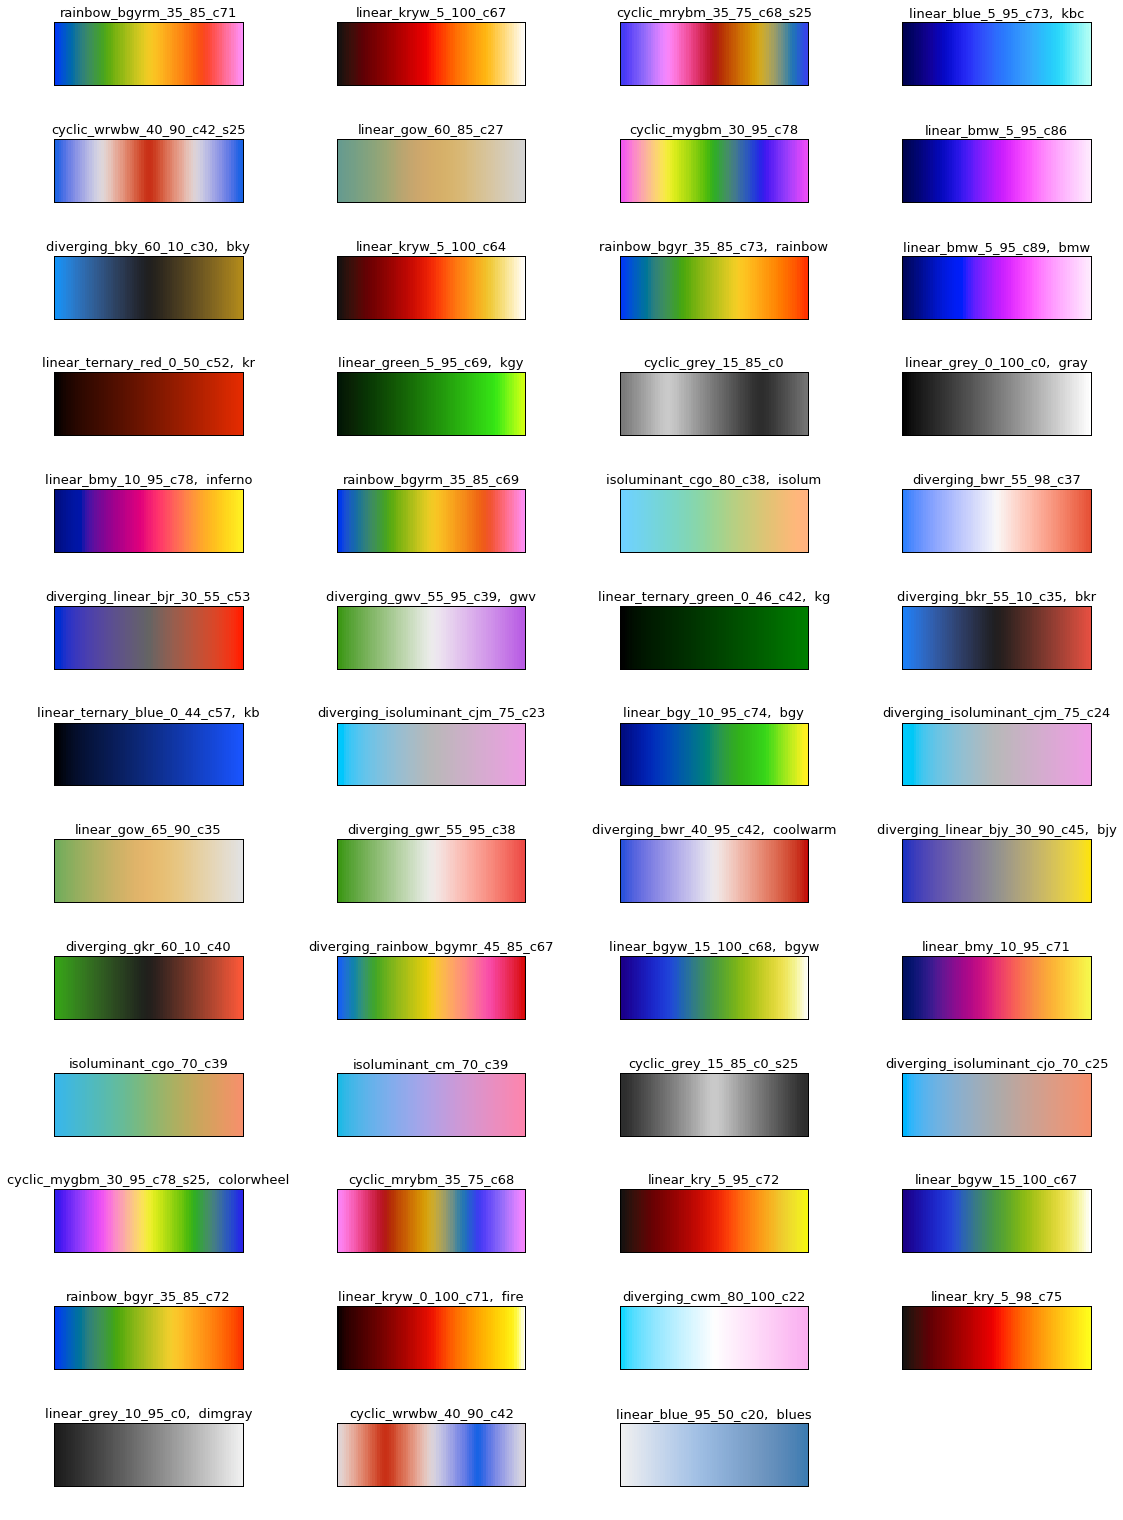

In [8]:
colormaps(all_cms, cols=4)

## Testing perceptual uniformity

Peter Kovesi created a test image with a sine grating modulation of intensity, where modulation gain decreases from top to bottom, which helps evaluate perceptual uniformity of a colormap at a glance.  The matplotlib maintainers use different definitions of perceptually uniform (uniformity in a different color space), but the new matplotlib perceptually uniform colormaps do well at Peter's test image:

In [9]:
%output size=200
%opts Image [xaxis='bare' yaxis='bare' sublabel_format=None aspect=4 fontsize=10]
sine=np.load("colourmaptest.npy")

:Layout
   .Viridis.I :Image   [x,y]   (z)
   .Inferno.I :Image   [x,y]   (z)
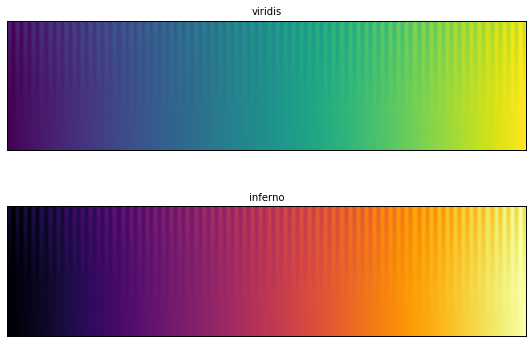

In [10]:
colormaps([["viridis"]*2,["inferno"]*2],cols=1,array=sine)

Here the sine grating for a uniform colormap should be visible as a fine-toothed comb with teeth that gradually become less visible from top to bottom.  The further down the comb these teeth are visible, the higher the discriminability of magnitudes at that location in the colormap.  Thus a perceptually uniform colormap, like the two above, should have teeth that visible at the same length for all colors.  

You can also use these images to evaluate the overall level of discriminability provided by a given colormap -- the longer the visible area of teeth, the better this colormap allows you to discriminate fine differences in magnitude.  Here the `inferno` map seems to have better discriminability than the `viridis` map, despite both being perceptually uniform.

The default colormaps that have traditionally been used with Matlab, Matplotlib, and HoloViews are clearly not perceptually uniform --  all the green and yellow areas are nearly indistinguishable:

:Layout
   .Hot.I :Image   [x,y]   (z)
   .Jet.I :Image   [x,y]   (z)
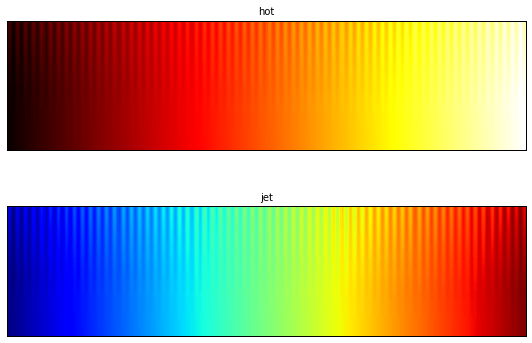

In [11]:
colormaps([["hot"]*2,["jet"]*2],cols=1,array=sine)

Thus those colormaps should be avoided if at all possible, to avoid generating misleading visualizations. Compare these two to the perceptually uniform versions provided by this package: 

:Layout
   .Fire.I    :Image   [x,y]   (z)
   .Rainbow.I :Image   [x,y]   (z)
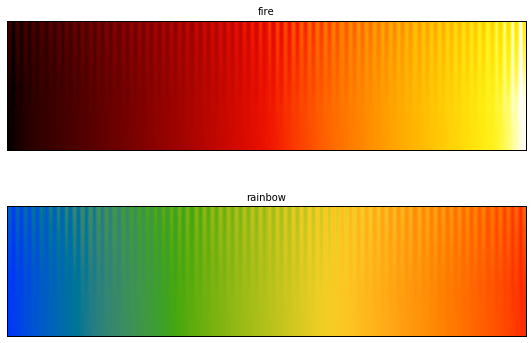

In [12]:
colormaps([("fire",cc.m_fire),("rainbow",cc.m_rainbow)],cols=1,array=sine)

We can see the results for all the `colorcet` colormaps below, which can be summarized as:

* "linear" colormaps all work well by this criterion
* "diverging" colormaps typically have discontinuities in perceptual discriminability around the central value
* "cyclic" colormaps with repeating colors tend to have discontinuities at 1/4 and 3/4 of the way through the cycle, or at other locations if shifted.
* "isoluminant" colormaps typically show no visible modulation, because without luminance cues humans can only discriminate low spatial-frequency modulations (i.e., much wider teeth would be needed for evaluating such colormaps)
* Some of the "rainbow" colormaps seem to have a perceptual discontinuity around the color red, the reasons for which are not yet clear.

:Layout
   .Rainbow_bgyrm_35_85_c71.I                     :Image   [x,y]   (z)
   .Cyclic_wrwbw_40_90_c42_s25.I                  :Image   [x,y]   (z)
   .Diverging_bky_60_10_c30_comma_bky.I           :Image   [x,y]   (z)
   .Linear_ternary_red_0_50_c52_comma_kr.I        :Image   [x,y]   (z)
   .Linear_bmy_10_95_c78_comma_inferno.I          :Image   [x,y]   (z)
   .Diverging_linear_bjr_30_55_c53.I              :Image   [x,y]   (z)
   .Linear_ternary_blue_0_44_c57_comma_kb.I       :Image   [x,y]   (z)
   .Linear_gow_65_90_c35.I                        :Image   [x,y]   (z)
   .Diverging_gkr_60_10_c40.I                     :Image   [x,y]   (z)
   .Isoluminant_cgo_70_c39.I                      :Image   [x,y]   (z)
   .Cyclic_mygbm_30_95_c78_s25_comma_colorwheel.I :Image   [x,y]   (z)
   .Rainbow_bgyr_35_85_c72.I                      :Image   [x,y]   (z)
   .Linear_grey_10_95_c0_comma_dimgray.I          :Image   [x,y]   (z)
   .Linear_kryw_5_100_c67.I                       :Image   [x,y]   (z)
   .Linear_gow_60_85_c27.I                        :Image   [x,y]   (z)
   .Linear_kryw_5_100_c64.I                       :Image   [x,y]   (z)
   .Linear_green_5_95_c69_comma_kgy.I             :Image   [x,y]   (z)
   .Rainbow_bgyrm_35_85_c69.I                     :Image   [x,y]   (z)
   .Diverging_gwv_55_95_c39_comma_gwv.I           :Image   [x,y]   (z)
   .Diverging_isoluminant_cjm_75_c23.I            :Image   [x,y]   (z)
   .Diverging_gwr_55_95_c38.I                     :Image   [x,y]   (z)
   .Diverging_rainbow_bgymr_45_85_c67.I           :Image   [x,y]   (z)
   .Isoluminant_cm_70_c39.I                       :Image   [x,y]   (z)
   .Cyclic_mrybm_35_75_c68.I                      :Image   [x,y]   (z)
   .Linear_kryw_0_100_c71_comma_fire.I            :Image   [x,y]   (z)
   .Cyclic_wrwbw_40_90_c42.I                      :Image   [x,y]   (z)
   .Cyclic_mrybm_35_75_c68_s25.I                  :Image   [x,y]   (z)
   .Cyclic_mygbm_30_95_c78.I                      :Image   [x,y]   (z)
   .Rainbow_bgyr_35_85_c73_comma_rainbow.I        :Image   [x,y]   (z)
   .Cyclic_grey_15_85_c0.I                        :Image   [x,y]   (z)
   .Isoluminant_cgo_80_c38_comma_isolum.I         :Image   [x,y]   (z)
   .Linear_ternary_green_0_46_c42_comma_kg.I      :Image   [x,y]   (z)
   .Linear_bgy_10_95_c74_comma_bgy.I              :Image   [x,y]   (z)
   .Diverging_bwr_40_95_c42_comma_coolwarm.I      :Image   [x,y]   (z)
   .Linear_bgyw_15_100_c68_comma_bgyw.I           :Image   [x,y]   (z)
   .Cyclic_grey_15_85_c0_s25.I                    :Image   [x,y]   (z)
   .Linear_kry_5_95_c72.I                         :Image   [x,y]   (z)
   .Diverging_cwm_80_100_c22.I                    :Image   [x,y]   (z)
   .Linear_blue_95_50_c20_comma_blues.I           :Image   [x,y]   (z)
   .Linear_blue_5_95_c73_comma_kbc.I              :Image   [x,y]   (z)
   .Linear_bmw_5_95_c86.I                         :Image   [x,y]   (z)
   .Linear_bmw_5_95_c89_comma_bmw.I               :Image   [x,y]   (z)
   .Linear_grey_0_100_c0_comma_gray.I             :Image   [x,y]   (z)
   .Diverging_bwr_55_98_c37.I                     :Image   [x,y]   (z)
   .Diverging_bkr_55_10_c35_comma_bkr.I           :Image   [x,y]   (z)
   .Diverging_isoluminant_cjm_75_c24.I            :Image   [x,y]   (z)
   .Diverging_linear_bjy_30_90_c45_comma_bjy.I    :Image   [x,y]   (z)
   .Linear_bmy_10_95_c71.I                        :Image   [x,y]   (z)
   .Diverging_isoluminant_cjo_70_c25.I            :Image   [x,y]   (z)
   .Linear_bgyw_15_100_c67.I                      :Image   [x,y]   (z)
   .Linear_kry_5_98_c75.I                         :Image   [x,y]   (z)
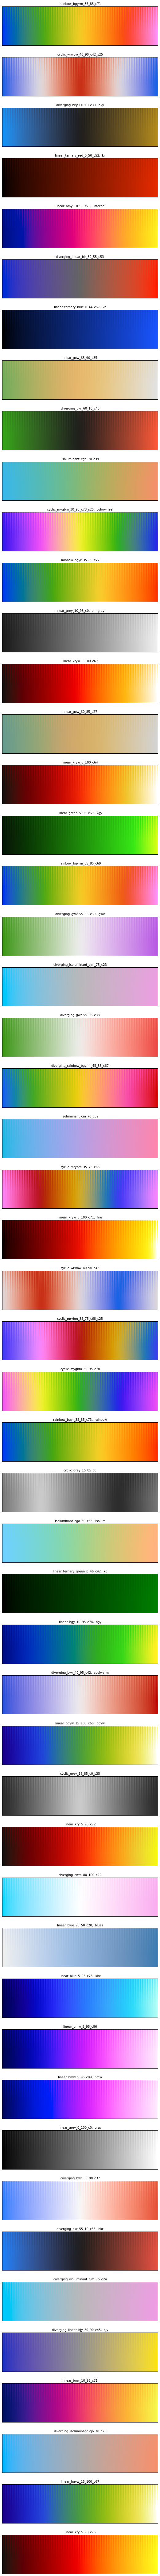

In [13]:
colormaps(all_cms,cols=1,array=sine)

In [5]:
from shaolin import Dashboard

In [17]:
class SeabornColor(Dashboard):
    
    def __init__(self,metaparam_dash,control_dash,title, **kwargs):
        self._metaparam_dash = metaparam_dash
        self._control_dash = control_dash
        dash = ['c$N=color_widget',
                [
                    ['r$N=row_title',['#'+title+'$N=title']],
                    ['r$N=row_controls',[self._metaparam_dash, self._control_dash]],
                    'HTML$n=fig_widget'
                ]
               ]
        
        self.pal = []
        self.cmap = self._init_mutable_colormap()
        Dashboard.__init__(self, dash, **kwargs)
        self.init_fig_widget()
    
    def _colormap_layout(self,_=None):
        if self.as_cmap.value:
            self.n_colors.visible = False
        else:
            self.n_colors.visible = True
            
    def init_fig_widget(self, size=1, height=None, width=None):
        f, ax = plt.subplots(1, 1, figsize=(1 * size, size))
        plt.close()
        
        
        self.fig_widget.widget.layout.height= height or "7em"
        self.fig_widget.widget.layout.width= width or "100%"
        
        self.fig_widget.target.layout.width= "100%"
        self.fig_widget.target.layout.height= "100%"
        self.fig_widget.value = self.fig_to_html(f)
    
    def update_fig_widget(self, _=None, height=None, width=None):
        if self.as_cmap.value:
            fig = self._cmap_figure(self.cmap)
        else:
            fig = self._palplot_figure(self.pal)
        self.fig_widget.value = self.fig_to_html(fig[0])# height=height, width=width)
    
    def get_mini_plot(self,height, width):
        if self.as_cmap.value:
            fig = self._cmap_figure(self.cmap)
        else:
           fig = self._palplot_figure(self.pal)
        return self.fig_to_html(fig[0], height=height, width=width)
    
    @staticmethod
    def _init_mutable_colormap():
        """Create a matplotlib colormap that will be updated by the widgets."""
        greys = color_palette("Greys", 256)
        cmap = LinearSegmentedColormap.from_list("interactive", greys)
        cmap._init()
        cmap._set_extremes()
        return cmap
    
    @staticmethod
    def _update_lut(cmap, colors):
        """Change the LUT values in a matplotlib colormap in-place."""
        cmap._lut[:256] = colors
        cmap._set_extremes()
        
    @staticmethod
    def _show_cmap(cmap):
        """Show a continuous matplotlib colormap."""
        from seaborn.rcmod import axes_style  # Avoid circular import
        with axes_style("white"):
            f, ax = plt.subplots(figsize=(13.25, .75))
        ax.set(xticks=[], yticks=[])
        x = np.linspace(0, 1, 256)[np.newaxis, :]
        ax.pcolormesh(x, cmap=cmap)
        
    @staticmethod
    def _palplot_figure(pal, size=1):
        """Return the matplotlib figure and axis corresponding to a palplot plot.
        Plot the values in a color palette as a horizontal array.
        Parameters
        ----------
        pal : sequence of matplotlib colors
            colors, i.e. as returned by seaborn.color_palette()
        size :
            scaling factor for size of plot
        """
        n = len(pal)
        f, ax = plt.subplots(1, 1, figsize=(n * size, size))
        ax.imshow(np.arange(n).reshape(1, n),
                  cmap=mpl.colors.ListedColormap(list(pal)),
                  interpolation="nearest", aspect="auto")
        ax.set_xticks(np.arange(n) - .5)
        ax.set_yticks([-.5, .5])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.close(f)
        return f, ax
    
    @staticmethod
    def _cmap_figure(cmap):
        """Show a continuous matplotlib colormap."""
        from seaborn.rcmod import axes_style  # Avoid circular import
        with axes_style("white"):
            f, ax = plt.subplots(figsize=(13.25, .75))
        ax.set(xticks=[], yticks=[])
        x = np.linspace(0, 1, 256)[np.newaxis, :]
        ax.pcolormesh(x, cmap=cmap)
        plt.close(f)
        return f, ax

    def fig_to_html(self, fig, img_class='', height=None, width=None):
        """This is a hack that converts a matplotlib like fig to an HTML image div"""
        from io import BytesIO
        import base64
        imgdata = BytesIO()
        fig.savefig(imgdata, format='png', bbox_inches=0, transparent=True)
        imgdata.seek(0)  # rewind the data
        svg_dta = imgdata.getvalue()
        svg_image = Image(svg_dta)#
        svg_b64 = base64.b64encode(svg_image.data).decode()
        height = height or self.fig_widget.target.layout.height
        width = width or self.fig_widget.target.layout.width
        return '<img class="cmap '+img_class+'" height="'+str(height)+'" width="'\
                +str(width)+'" src="data:image/png;base64,'+svg_b64+'" />'


In [30]:
all_names = [x for x,v in list(all_cms)]

In [31]:
dict(all_cms)

{'cyclic_grey_15_85_c0': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebfa76a0>,
 'cyclic_grey_15_85_c0_s25': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebfc0fd0>,
 'cyclic_mrybm_35_75_c68': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebf70940>,
 'cyclic_mrybm_35_75_c68_s25': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebf202b0>,
 'cyclic_mygbm_30_95_c78': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebf4fbe0>,
 'cyclic_mygbm_30_95_c78_s25,  colorwheel': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebefe550>,
 'cyclic_wrwbw_40_90_c42': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebeaee80>,
 'cyclic_wrwbw_40_90_c42_s25': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebe5d7f0>,
 'diverging_bkr_55_10_c35,  bkr': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebd2b940>,
 'diverging_bky_60_10_c30,  bky': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebcdb2b0>,
 'diverging_bwr_40_95_c42,  coolwarm': <matplotlib.colors.Lin

In [29]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from seaborn.palettes import (color_palette, dark_palette, light_palette,
                              diverging_palette, cubehelix_palette)

from IPython.core.display import Image
from matplotlib import cm
import matplotlib as mpl

In [68]:
all_cmaps = dict([i for i in all_cms ])
dict([(x.split(',')[1].lstrip(' '),v) for x,v in all_cmaps.items() if ',' in x])

{'bgy': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebb38fd0>,
 'bgyw': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eba9a2b0>,
 'bjy': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebdcb6a0>,
 'bkr': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebd2b940>,
 'bky': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebcdb2b0>,
 'blues': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eba79550>,
 'bmw': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ec083a90>,
 'colorwheel': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebefe550>,
 'coolwarm': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebd09be0>,
 'dimgray': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eb8242b0>,
 'fire': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eb7b2e80>,
 'gray': <matplotlib.colors.LinearSegmentedColormap at 0x7f50eb874940>,
 'gwv': <matplotlib.colors.LinearSegmentedColormap at 0x7f50ebbf9a90>,
 'inferno': <matplotlib.colors.LinearSegmentedColormap a

In [242]:
import colorcet as cc
class Colorcet(SeabornColor):
    def __init__(self,**kwargs):
        
        # Collapse all colormap aliases into a single string, and then sort by it
        inverse = {}
        inv_rev = {}
        for k,v in cc.cm.items():
            if not k[-2:] == "_r":
                inverse[v] = inverse.get(v, [])
                inverse[v].insert(0,k)
            else:
                inv_rev[v] = inverse.get(v, [])
                inv_rev[v].insert(0,k)
        all_cms = {',  '.join(reversed(v)):k for (k,v) in inverse.items()}.items()
        rev_cms = {',  '.join(reversed(v)):k for (k,v) in inv_rev.items()}.items()
        self._all_cmaps = dict([i for i in all_cms])
        self._rev_cmaps = dict([i for i in rev_cms])
        self._div_cms = dict([i for i in all_cms if "diverging" in i[0]])
        self._iso_cms = dict([i for i in all_cms if "isoluminant" in i[0]])
        self._linear_cms = dict([i for i in all_cms if "linear" in i[0]])
        self._cycle_cms = dict([i for i in all_cms if "cyclic" in i[0]])
        self._alias_cms = dict([(x.split(',')[1].lstrip(' '),v) for x,v in all_cmaps.items() if ',' in x])
        control_box = ['c$N=seaborn_palette',
                               [
                                ['c$N=varopts_row',['@select$N=isolum&d=Isoluminant',
                                                    '@select$N=divergs&d=Diverging',
                                                    '@select$N=linear&d=Linear',
                                                    '@select$N=cyclic&d=Cyclic',
                                                    '@select$N=aliased&d=Aliased cmaps'
                                                   ]],
                                

                               ]
                              ]
        metaparam_box =['c$N=cbw_metaparam_box',
                        [
                         '@dd$D=Cmap type&o=["Cyclic","Aliased","Isoluminance","Diverging","Linear"]',
                         ['r$N=subsub_row',['@True$d=As cmap','@False$d=Reversed']],
                         '@int_slider$d=n_colors&min=2&max=32&val=10&step=1'
                        ]
                       ]

        SeabornColor.__init__(self,metaparam_dash=metaparam_box,control_dash=control_box,title='Colorcet')
        self.isolum.options = list(self._iso_cms.keys())
        self.divergs.options = list(self._div_cms.keys())
        self.linear.options = list(self._linear_cms.keys())
        self.cyclic.options = list(self._cycle_cms.keys())
        self.aliased.options = list(self._alias_cms.keys())
        self.aliased.layout.max_width = "15em"
        
        self.isolum.observe(self.update)
        self.divergs.observe(self.update)
        self.linear.observe(self.update)
        self.cyclic.observe(self.update)
        self.aliased.observe(self.update)
        self.reversed.observe(self._update_rev)
        self.as_cmap.observe(self._update_as_cmap)
        self.n_colors.observe(self._update_as_cmap)
        self.cmap_type.observe(self._update_layout)
        self.aliased.value = 'inferno'
        self.cmap_type.value = "Aliased"
        self.cmap_type.layout.max_width = "15em"
    
    
    
    def update(self,val):
        self.cmap = cc.cm[val['new']]
        self._curr_cmap = val['new']
        if not self.as_cmap.value:
            self._update_as_cmap()
        else:
            self.update_fig_widget()
        
    def _update_rev(self,val):
        if self.reversed.value:
            self._curr_cmap += '_r'
            self.cmap = cc.cm[self._curr_cmap]
        else:
            if self._curr_cmap[-2:]=='_r':
                self._curr_cmap = self._curr_cmap[:-2]
            self.cmap = cc.cm[self._curr_cmap]
        self.update_fig_widget()
    
    def _update_layout(self,val):
        if val['new']=='Aliased':
            self.aliased.visible = True
            self.isolum.visible = False
            self.divergs.visible = False
            self.cyclic.visible = False
            self.linear.visible = False
        elif val['new']=='Linear':
            self.aliased.visible = False
            self.isolum.visible = False
            self.divergs.visible = False
            self.cyclic.visible = False
            self.linear.visible = True
        elif val['new']=='Isoluminance':
            self.aliased.visible = False
            self.isolum.visible = True
            self.divergs.visible = False
            self.cyclic.visible = False
            self.linear.visible = False
        elif val['new']=='Diverging':
            self.aliased.visible = False
            self.isolum.visible = False
            self.divergs.visible = True
            self.cyclic.visible = False
            self.linear.visible = False
        elif val['new']=='Cyclic':
            self.aliased.visible = False
            self.isolum.visible = False
            self.divergs.visible = False
            self.cyclic.visible = True
            self.linear.visible = False
        
        
    
    def _update_as_cmap(self,_=None):
        if not self.as_cmap.value:
            x = np.linspace(0,1,num=self.n_colors.value)
            
            self.pal[:] = ListedColormap(self.cmap(x))(x)
        self.update_fig_widget()   

In [245]:
co[0]

In [244]:
co = Colorcet()

In [212]:
co.cmap_type.widget.class_get_trait_help()

TypeError: class_get_trait_help() missing 1 required positional argument: 'trait'

In [214]:
co.cmap_type.widget.class_trait_names()

['_property_lock',
 '_display_callbacks',
 'tooltips',
 'parent',
 'button_style',
 '_model_module',
 'msg_throttle',
 'layout',
 'config',
 'icons',
 'keys',
 'description',
 'comm',
 '_view_name',
 '_options_dict',
 'log',
 '_msg_callbacks',
 '_options_values',
 'value',
 '_view_module_version',
 'disabled',
 '_model_name',
 '_options_labels',
 '_view_module',
 '_states_to_send',
 'options',
 '_model_module_version',
 '_dom_classes']

In [197]:
        if selected.as_cmap.value:
            rgb_colors = self.cmap(norm)
        else:
            self.pal_cmap = ListedColormap(self.pal,
                                      N=selected.n_colors.value)
            rgb_colors = self.pal_cmap(norm)

NameError: name 'selected' is not defined

In [198]:
cc.bokeh_palette('inferno',cc.inferno)

ValueError: too many values to unpack (expected 3)

In [200]:
ListedColormap(co.cmap(np.linspace(0,1,10)))

In [189]:
co.pal

[]